In [1]:
import numpy as np
import matplotlib.pyplot as plt
url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url, dtype=object, skiprows=1)
data=data.astype('float')

# Exercise on Numpy and Matplotlib

The data in populations.txt describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with np.loadtxt and do the following exercises without for-loops.

Plot the populations for the years in the period. Add legend and axis labels to the plot.

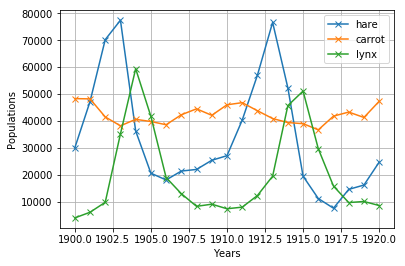

In [2]:
plt.plot(data[:,0], data[:,1], '-x', label = 'hare')
plt.plot(data[:,0], data[:,3],'-x', label = 'carrot')
plt.plot(data[:,0], data[:,2],'-x', label = 'lynx')
plt.xlabel('Years')
plt.ylabel('Populations')
plt.legend()
plt.grid()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

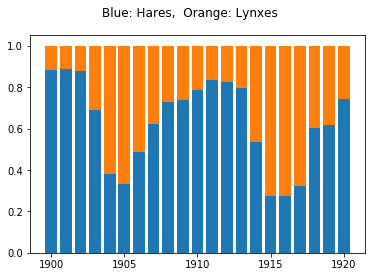

In [3]:
fig, ax = plt.subplots()
hare=data[:, 1]/(data[:, 1] + data[:, 2])
lynx=data[:, 2]/(data[:, 1] + data[:, 2])
ax.bar(data[:,0], hare)
ax.bar(data[:,0], lynx, bottom = hare)

fig.suptitle('Blue: Hares,  Orange: Lynxes ')
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

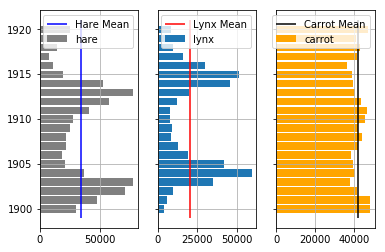

Hare std:  21413.981858767394   Lynx std:  16655.999919948765   Carrot std:  3404.555771315841


In [6]:
import math

def std(data):
    m = np.mean(data)
    return math.sqrt(np.sum((data - m)**2)/(len(data)-1))

m_h = np.mean(data[:, 1])
m_l = np.mean(data[:, 2])
m_c = np.mean(data[:, 3])
s_h = std(data[:, 1])
s_l = std(data[:, 2])
s_c = std(data[:, 3])

fig, axs = plt.subplots(1, 3, sharey=True)

axs[0].barh(data[:, 0], data[:, 1], label='hare', color="gray")
axs[1].barh(data[:, 0], data[:, 2], label='lynx')
axs[2].barh(data[:, 0], data[:, 3], label='carrot', color="orange")

axs[0].vlines(m_h, 1899, 1921, colors = "blue", label = 'Hare Mean')
axs[1].vlines(m_l, 1899, 1921, colors = "red", label = 'Lynx Mean')
axs[2].vlines(m_c, 1899, 1921, colors = "black", label = 'Carrot Mean')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].grid()
axs[1].grid()
axs[2].grid()

plt.show()
print("Hare std: ", s_h, "  Lynx std: ", s_l, "  Carrot std: ", s_c)

Find which year each species had the largest population. Mark these years in the plot of populations.

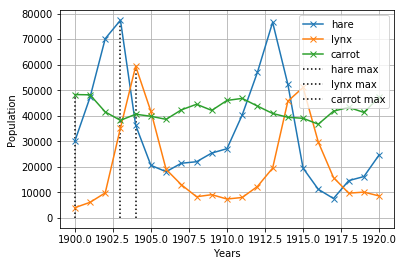

In [7]:
plt.plot(data[:, 0], data[:, 1], '-x', label='hare')
plt.plot(data[:, 0], data[:, 2], '-x', label='lynx')
plt.plot(data[:, 0], data[:, 3], '-x', label='carrot')

plt.vlines(data[np.argmax(data[:, 1]), 0], 0, data[np.argmax(data[:, 1]), 1], linestyles="dotted", label='hare max')
plt.vlines(data[np.argmax(data[:, 2]), 0], 0, data[np.argmax(data[:, 2]), 2], linestyles="dotted", label='lynx max')
plt.vlines(data[np.argmax(data[:, 3]), 0], 0, data[np.argmax(data[:, 3]), 3], linestyles="dotted", label='carrot max')

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


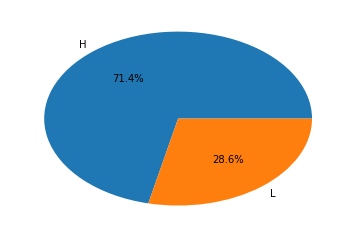

In [8]:
a=np.where(data[:, 1]-data[:,2]>0, 'H', 'L')
print (a)

cir=np.array([len(np.argwhere(a == 'H')), len(np.argwhere(a == 'L'))])
plt.pie(cir, labels=['H', 'L'], autopct='%1.1f%%')
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

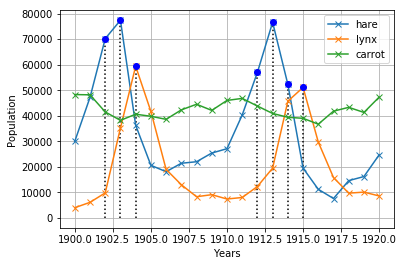

In [9]:
plt.plot(data[:, 0], data[:, 1], '-x', label='hare')
plt.plot(data[:, 0], data[:, 2], '-x', label='lynx')
plt.plot(data[:, 0], data[:, 3], '-x', label='carrot')

ind_h=np.where(data[:, 1]>50000)
ind_l=np.where(data[:, 2]>50000)
ind_c=np.where(data[:, 3]>50000)
plt.vlines(data[ind_h, 0], 0, data[ind_h, 1], linestyles="dotted")
plt.vlines(data[ind_l, 0], 0, data[ind_l, 2], linestyles="dotted")
plt.vlines(data[ind_c, 0], 0, data[ind_c, 3], linestyles="dotted")
plt.plot(data[ind_h, 0], data[ind_h, 1], "bo")
plt.plot(data[ind_l, 0], data[ind_l, 2], "bo")
plt.plot(data[ind_c, 0], data[ind_c, 3], "bo")

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [10]:
sort_h = np.argsort(data[:, 1], kind='quicksort')
sort_l = np.argsort(data[:, 2], kind='quicksort')
sort_c = np.argsort(data[:, 3], kind='quicksort')

print ("hare:", data[sort_h[0], 0], ", ", data[sort_h[1], 0])
print ("lynx:", data[sort_l[0], 0], ", ", data[sort_l[1], 0])
print ("carrot:", data[sort_c[0], 0], ", ", data[sort_c[1], 0])

hare: 1917.0 ,  1916.0
lynx: 1900.0 ,  1901.0
carrot: 1916.0 ,  1903.0


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

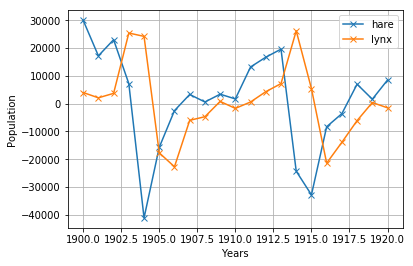

Correlation coefficient:    -0.14267228428656253


In [11]:
change=np.empty((len(data), 3))
change[:,0]=data[:,0]
change[0,1]=data[0,1]
change[1:,1]=np.diff(data[:,1])

change[0,2]=data[0,2]
change[1:,2]=np.diff(data[:,2])

plt.plot(change[:, 0], change[:, 1], '-x', label='hare')
plt.plot(change[:, 0], change[:, 2], '-x', label='lynx')

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

print("Correlation coefficient:   ", np.corrcoef(change[:, 1], change[:, 2])[0, 1])

Show population of hares vs carrots and hares vs lynxes.

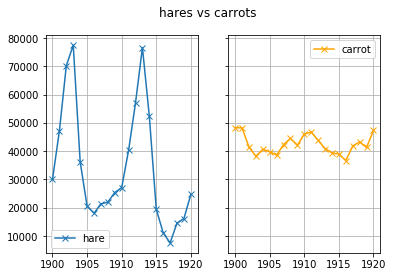

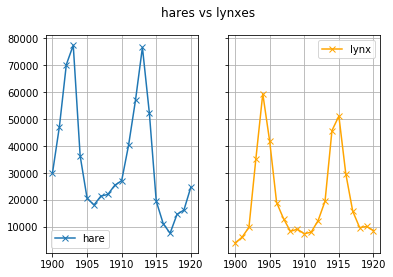

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('hares vs carrots')
axs[0].plot(data[:,0], data[:,1], '-x', label = 'hare')
axs[1].plot(data[:,0], data[:,3],'-x', label = 'carrot', color='orange')

axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('hares vs lynxes')
axs[0].plot(data[:,0], data[:,1], '-x', label = 'hare')
axs[1].plot(data[:,0], data[:,2],'-x', label = 'lynx', color='orange')

axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

plt.show()